<head>
  <meta name="author" content="Gustavo Rocha">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

## <h1 align=left><font size = 6, style="color:rgb(200,0,0)">Fundamentos de NLP</font></h1>
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Gráficos com palavras

Neste primeiro exercício/exemplo vamos aprender a fazer gráficos com palavras retomando um exemplo da primeira aula.



Continuaremos a trabalhar nesse primeiro exemplo com os textos do Shakeaspeare.

In [2]:
!wget 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt' -O RomeoandJuliet.txt

--2023-11-27 21:25:36--  https://www.gutenberg.org/cache/epub/1513/pg1513.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169486 (166K) [text/plain]
Saving to: ‘RomeoandJuliet.txt’

RomeoandJuliet.txt  100%[===================>] 165,51K   440KB/s    in 0,4s    

2023-11-27 21:25:38 (440 KB/s) - ‘RomeoandJuliet.txt’ saved [169486/169486]



In [3]:
!pip install wordcloud

In [4]:
from pathlib import Path
text = Path('RomeoandJuliet.txt').read_text()

In [5]:
from wordcloud import WordCloud

In [6]:
wordcloud = WordCloud(width=2000, height=1000,
    colormap='prism', background_color='white')

In [7]:
wordcloud = wordcloud.generate(text)

In [8]:
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

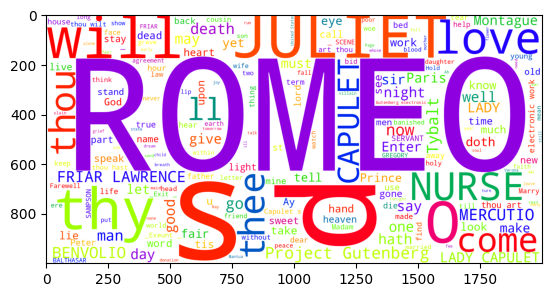

In [9]:
plt.imshow(wordcloud)

## Repita o exercício acima para o texto do Hamlet

# Frequência com Gráficos de Barras

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /home/andvsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andvsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'textblob'

In [ ]:
%matplotlib inline
from pathlib import Path
blob = TextBlob(Path('RomeoandJuliet.txt').read_text())
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
items = blob.word_counts.items()

In [ ]:
items = [item for item in items if item[0] not in stop_words]

In [ ]:
from operator import itemgetter

In [ ]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [ ]:
top20 = sorted_items[0:21]

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(top20, columns=['word', 'count'])

In [ ]:
df

,word,count
0,’,873
1,romeo,319
2,thou,278
3,juliet,194
4,thy,170
5,capulet,163
6,nurse,149
7,love,148
8,thee,138
9,lady,117


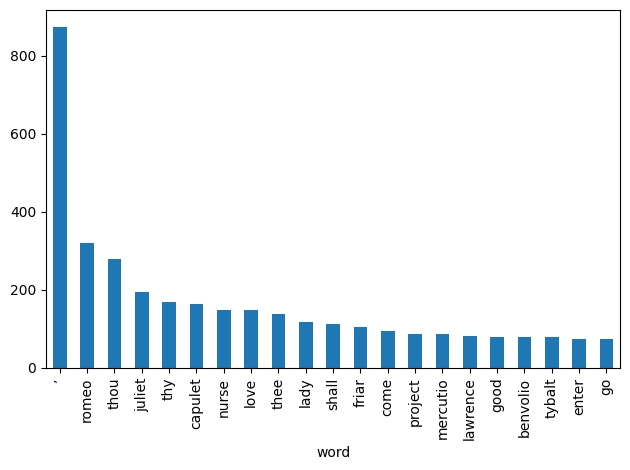

In [ ]:
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

Repita o Exercício acima para o texto do Hamlet

# Análise de Sentimento

Use a biblioteca textblob para fazer análise de sentimento nas seguintes sentenças#

1 - A grama da vizinho é sempre mais verde. -> The grass is always greener on the other side of the fence.
2 - Cada um por si e Deus por todos. -> Every man for himself (and the devil take the hindmost).
3 - Diga com quem andas e te direi quem és. ->	Birds of a feather flock together.


In [ ]:
import nltk
nltk.download('punkt')
from textblob import TextBlob
text = 'The grass is always greener on the other side of the fence. Every man for himself (and the devil take the hindmost). Birds of a feather flock together. '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#crie o blob
blob = TextBlob(text)

In [ ]:
#mostre cada uma das sentenças
blob.sentences

[Sentence("The grass is always greener on the other side of the fence."),
 Sentence("Every man for himself (and the devil take the hindmost)."),
 Sentence("Birds of a feather flock together.")]

In [ ]:
#calcule o score de sentimento (polarity e subjectivity) para cada sentença
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


# Lematização com a spaCy

No exercício abaixo, use as sentenças do exercício anterior para lematizar.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("") # substitua seu texto aqui

In [ ]:
for token in doc:
  print(token.text,token.lemma_)

# POS Tagging com spaCy

Utilize as mesmas sentenças do exercício anterior para fazer POS Tagging. Interprete o significado e verifique se estão de acordo com o esperado.

In [ ]:
doc = nlp("") #seu texto vai aqui

for token in doc:
    print(token.text, token.lemma_,token.tag_)

# Vetorizando com o TF_IDF

Fique tranquilo. Neste exercício vamos apenas mostrar como fazer TF-IDF no Python. Se preocupe em acompanhar a sequencia de raciocínio aqui. Mais uma vez iremos utilizar as 3 sentenças anteriores:


In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/main/data/cuisine_data.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Document1= "The grass is always greener on the other side of the fence."
Document2= " Every man for himself (and the devil take the hindmost)."
Document3= "Birds of a feather flock together."
Doc = [Document1 ,
       Document2 ,
       Document3]
print(Doc)

['The grass is always greener on the other side of the fence.', ' Every man for himself (and the devil take the hindmost).', 'Birds of a feather flock together.']


In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(Doc)

In [ ]:
analyze = vectorizer.build_analyzer()

print('Document 1',analyze(Document1))

print('Document 2',analyze(Document2))

print('Document 3',analyze(Document3))

print('Document transform',X.toarray())

Document 1 ['the', 'grass', 'is', 'always', 'greener', 'on', 'the', 'other', 'side', 'of', 'the', 'fence']
Document 2 ['every', 'man', 'for', 'himself', 'and', 'the', 'devil', 'take', 'the', 'hindmost']
Document 3 ['birds', 'of', 'feather', 'flock', 'together']
Document transform [[0.26934719 0.         0.         0.         0.         0.
  0.26934719 0.         0.         0.26934719 0.26934719 0.
  0.         0.26934719 0.         0.20484548 0.26934719 0.26934719
  0.26934719 0.         0.61453645 0.        ]
 [0.         0.311383   0.         0.311383   0.311383   0.
  0.         0.         0.311383   0.         0.         0.311383
  0.311383   0.         0.311383   0.         0.         0.
  0.         0.311383   0.4736296  0.        ]
 [0.         0.         0.46735098 0.         0.         0.46735098
  0.         0.46735098 0.         0.         0.         0.
  0.         0.         0.         0.35543247 0.         0.
  0.         0.         0.         0.46735098]]


In [ ]:
print(vectorizer.get_feature_names_out())

['always' 'and' 'birds' 'devil' 'every' 'feather' 'fence' 'flock' 'for'
 'grass' 'greener' 'himself' 'hindmost' 'is' 'man' 'of' 'on' 'other'
 'side' 'take' 'the' 'together']


In [ ]:
len((vectorizer.get_feature_names_out()))

22

In [ ]:
import pandas as pd
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
df

,always,and,birds,devil,every,feather,fence,flock,for,grass,...,hindmost,is,man,of,on,other,side,take,the,together
0,0.269347,0.000000,0.000000,0.000000,0.000000,0.000000,0.269347,0.000000,0.000000,0.269347,...,0.000000,0.269347,0.000000,0.204845,0.269347,0.269347,0.269347,0.000000,0.614536,0.000000
1,0.000000,0.311383,0.000000,0.311383,0.311383,0.000000,0.000000,0.000000,0.311383,0.000000,...,0.311383,0.000000,0.311383,0.000000,0.000000,0.000000,0.000000,0.311383,0.473630,0.000000
2,0.000000,0.000000,0.467351,0.000000,0.000000,0.467351,0.000000,0.467351,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.355432,0.000000,0.000000,0.000000,0.000000,0.000000,0.467351


# Repita o Processo agora para um novo conjunto de sentenças

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/main/data/cuisine_data.csv')

In [ ]:
df.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


In [ ]:
df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [ ]:
ingredientes = df.cuisine_description.to_list()

In [ ]:
X = vectorizer.fit_transform(ingredientes)

In [ ]:
print('Document transform',X.toarray())

Document transform [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(vectorizer.get_feature_names_out())

['00' '10' '100' ... 'ziti' 'zucchini' 'épices']


In [ ]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
df

,00,10,100,14,15,25,33,40,43,95,...,za,zatarain,zatarains,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
39770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.341027,0.0,0.0,0.0,0.0
39771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
39772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
